<a href="https://colab.research.google.com/github/VoznesenskayaV/LabOP/blob/main/Worshop_2_2_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Worshop 2.2 Pandas

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература

- http://pandas.pydata.org/pandas-docs/stable/10min.html
- https://pandas.pydata.org/pandas-docs/stable/indexing.html
- https://pandas.pydata.org/pandas-docs/stable/missing_data.html

В этом задании мы с вами рассмотрим датасет [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult).
Основывается он на данных переписи населения 1994 года в США.

Расшифровка содержимого колонок:

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous. sampling weight, more here: SIPP Weighting.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous. Income from investment sources, apart from wages/salary.
- capital-loss: continuous. Losses from investment sources, apart from wages/salary.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [1]:
%matplotlib inline
import pandas as pd
pd.__version__

'1.5.3'

Если вы увидели warning, не переживайте, всё хорошо.
- https://stackoverflow.com/questions/40845304/runtimewarning-numpy-dtype-size-changed-may-indicate-binary-incompatibility
- https://github.com/numpy/numpy/pull/432

In [2]:
columns='age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income'.split(',')
# df = pd.read_csv('../../data/adult.csv.gz', na_values='?') # можно загрузить из файла или URL
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values='?', names=columns)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


1) Выведите последние 10 элеметнов датасета

In [4]:
elements = df.tail(10)
print(elements)

       age      workclass  fnlwgt      education  education.num  \
32551   32        Private   34066           10th              6   
32552   43        Private   84661      Assoc-voc             11   
32553   32        Private  116138        Masters             14   
32554   53        Private  321865        Masters             14   
32555   22        Private  310152   Some-college             10   
32556   27        Private  257302     Assoc-acdm             12   
32557   40        Private  154374        HS-grad              9   
32558   58        Private  151910        HS-grad              9   
32559   22        Private  201490        HS-grad              9   
32560   52   Self-emp-inc  287927        HS-grad              9   

            marital.status          occupation    relationship  \
32551   Married-civ-spouse   Handlers-cleaners         Husband   
32552   Married-civ-spouse               Sales         Husband   
32553        Never-married        Tech-support   Not-in-family  

2) Сколько колонок и сколько строк в этом датасете?

In [8]:
shape = df.shape
num_rows, num_columns = shape
print(f"Количество строк: {num_rows}")
print(f"Количество столбцов: {num_columns}")

Количество строк: 32561
Количество столбцов: 15


3) Какие типы данных у элементов этого датасета?

In [9]:
data_types = df.dtypes
print(data_types)

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object


4) Какие признаки имеют пропуски?

In [11]:
df.info() #Пропусков нет, но, при дальнейшем анализе датасета были обнаружены
          # символы "?" во многих признаках, поэтому далее подсчитываю количество этих
          # символов в каждом признаке датасета

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [16]:
question_marks_count = (df == ' ?').sum()

# Выводим количество символов " ?" в каждом признаке
print("Количество символов ' ?' в каждом признаке:")
print(question_marks_count)

Количество символов ' ?' в каждом признаке:
age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


5) Как вы думаете, с чем связаны пропуски этих значение. Напишите развернутый ответ в ячейке ниже.

Ваш ответ:
Причин может быть несколько. Возможно, информация о каком-либо человеке была не учтена или неккоректно собрана, либо человек сам не указал ту или иную информацию о себе. Также могли возникнуть трудности при обработке данных, в следствие которых данные могли быть утеряны.

6) Какие и сколько различных рабочих классов workclass представлено в выборке?

In [12]:
workclass_counts = df['workclass'].value_counts()
print("Различные рабочие классы и их количество:")
print(workclass_counts)

Различные рабочие классы и их количество:
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64


7) Какой средний возраст женщин и мужчин?

In [18]:
average_age_women = round(df[df['sex'] == ' Female']['age'].mean(), 2)
average_age_men = round(df[df['sex'] == ' Male']['age'].mean(), 2)
print("Средний возраст женщин:", average_age_women)
print("Средний возраст мужчин:", average_age_men)

Средний возраст женщин: 36.86
Средний возраст мужчин: 39.43


8) Постройте гистограмму(bar) распределения образования людей (education)

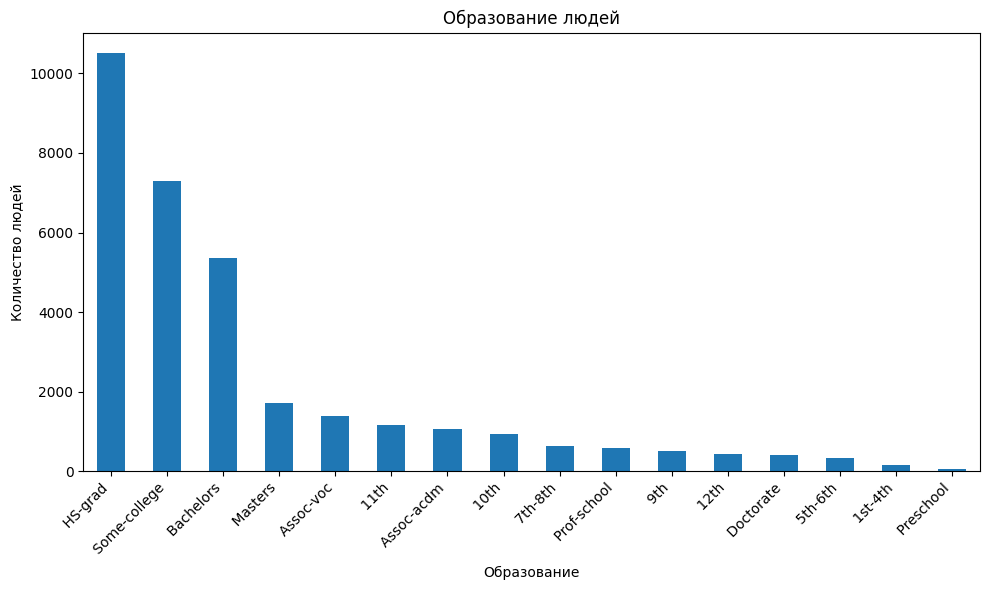

In [21]:
import matplotlib.pyplot as plt
education_counts = df['education'].value_counts()
education_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Образование')
plt.ylabel('Количество людей')
plt.title('Образование людей')
plt.xticks(rotation=45, ha='right') # Поворот названий
plt.tight_layout()
plt.show()

9) Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак salary) и тех, кто получает менее 50K в год?

In [23]:
average_age_high_income = df[df['income'] == ' >50K']['age'].mean()
std_age_high_income = df[df['income'] == ' >50K']['age'].std()
average_age_low_income = df[df['income'] == ' <=50K']['age'].mean()
std_age_low_income = df[df['income'] == ' <=50K']['age'].std()
print("Средний возраст для тех, кто получает более 50K:", average_age_high_income)
print("Среднеквадратичное отклонение возраста для тех, кто получает более 50K:", std_age_high_income)
print("Средний возраст для тех, кто получает менее 50K:", average_age_low_income)
print("Среднеквадратичное отклонение возраста для тех, кто получает менее 50K:", std_age_low_income)

Средний возраст для тех, кто получает более 50K: 44.24984058155847
Среднеквадратичное отклонение возраста для тех, кто получает более 50K: 10.519027719851826
Средний возраст для тех, кто получает менее 50K: 36.78373786407767
Среднеквадратичное отклонение возраста для тех, кто получает менее 50K: 14.02008849082488


10) Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)

In [32]:
# Список образований (высших)
higher_education = [' Bachelors', ' Prof-school', ' Assoc-acdm', ' Assoc-voc', ' Masters', ' Doctorate']

# Проверка, имеют ли люди высшее образование
def has_higher_education(row):
    return row['education'] in higher_education # row - обращение к столбцу с образованиями

# Создание столбца "has_higher_education"
df['has_higher_education'] = df.apply(has_higher_education, axis=1)

grouped_data = df.groupby(['income', 'has_higher_education']).size().unstack()
print(grouped_data)
if '>50K' in grouped_data.index and False in grouped_data.columns:
    count = grouped_data.loc['>50K', False]
    print(f"Есть {count} человек(а) с доходом >50K, но без высшего образования.")
else:
    print("Все люди с доходом >50K имеют высшее образование.")

has_higher_education  False  True 
income                            
 <=50K                18739   5981
 >50K                  3306   4535
Все люди с доходом >50K имеют высшее образование.


11) Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.

In [52]:
result = df[df['sex'] == ' Male'].groupby(['marital.status', 'income'])['income'].count() / df[df['sex'] == ' Male'].groupby(['marital.status'])['income'].count()
print("Доля женатых мужчин с доходом >50K:")
print(result.loc[' Married-civ-spouse'][' >50K'] + result.loc[' Married-spouse-absent'][' >50K'] + result.loc[' Married-AF-spouse'][' >50K'])
print("Доля холостых мужчин с доходом >50K:")
print(result.loc[' Never-married'][' >50K'])
if (result.loc[' Married-civ-spouse'][' >50K'] + result.loc[' Married-spouse-absent'][' >50K'] + result.loc[' Married-AF-spouse'][' >50K']) > result.loc[' Never-married'][' >50K']:
    print("Среди женатых мужчин больше доля людей с доходом >50K.")
elif (result.loc[' Married-civ-spouse'][' >50K'] + result.loc[' Married-spouse-absent'][' >50K'] + result.loc[' Married-AF-spouse'][' >50K']) < result.loc[' Never-married'][' >50K']:
    print("Среди холостых мужчин больше доля людей с доходом >50K.")
else:
    print("Доли одинаковы среди женатых и холостых мужчин.")

Доля женатых мужчин с доходом >50K:
0.9982549315631675
Доля холостых мужчин с доходом >50K:
0.054935767410412444
Среди женатых мужчин больше доля людей с доходом >50K.


12) Посчитайте среднее время работы (hours-per-week) зарабатывающих мало и много (salary) для каждой страны (native-country).

In [54]:
result = df.groupby(['native.country', 'income'])['hours.per.week'].mean().unstack()
print(result)

income                           <=50K       >50K
native.country                                   
 ?                           40.164760  45.547945
 Cambodia                    41.416667  40.000000
 Canada                      37.914634  45.641026
 China                       37.381818  38.900000
 Columbia                    38.684211  50.000000
 Cuba                        37.985714  42.440000
 Dominican-Republic          42.338235  47.000000
 Ecuador                     38.041667  48.750000
 El-Salvador                 36.030928  45.000000
 England                     40.483333  44.533333
 France                      41.058824  50.750000
 Germany                     39.139785  44.977273
 Greece                      41.809524  50.625000
 Guatemala                   39.360656  36.666667
 Haiti                       36.325000  42.750000
 Holand-Netherlands          40.000000        NaN
 Honduras                    34.333333  60.000000
 Hong                        39.142857  45.000000


13) Постройте сводную таблицу для сравнения уровня образования и разницы между capital.gain и capital.loss (то есть пассивный доход). Сделайте так, чтобы capital.gain - capital.loss создали не больше 10 разных уникальных значений. То есть, gain и loss - это числа в каком-то диапазоне. Это количественные признаки из вещественных чисел. С помощью математических функций, типа log, извлечение корня N-ой степени и округления можно перейти к категориальным признакам.

In [62]:
df['capital.diff'] = df['capital.gain'] - df['capital.loss']
pivot_table = df.pivot_table(index='capital.diff', aggfunc='size')

# 10 наиболее часто встречающихся разниц
top_10_diff = pivot_table.nlargest(10).index.tolist()

# Строки с разницами
df_filtered = df[df['capital.diff'].isin(top_10_diff)]

pivot_table = df_filtered.pivot_table(index='capital.diff', columns='education', aggfunc='size', fill_value=0)
print(pivot_table)

education      10th   11th   12th   1st-4th   5th-6th   7th-8th   9th  \
capital.diff                                                            
-1977             2      0      0         0         0         1     0   
-1902             0      2      0         0         1         2     0   
-1887             4      1      0         0         1         1     0   
 0              865   1089    403       159       308       582   474   
 3103             1      1      1         0         0         0     0   
 5178             1      4      0         0         1         0     2   
 7298             0      1      1         0         3         1     0   
 7688             1      5      3         1         0         2     0   
 15024            0      0      2         0         0         0     0   
 99999            2      0      0         0         0         0     1   

education      Assoc-acdm   Assoc-voc   Bachelors   Doctorate   HS-grad  \
capital.diff                                    

14) Женщины из каких стран получают в среднем большую зарплату (>50K) чаще.

In [65]:
women_high_income = df[(df['sex'] == ' Female') & (df['income'] == ' >50K')]
country_counts = women_high_income['native.country'].value_counts()
top_country = country_counts.idxmax()
print(f"Страна, из которой женщины получают в среднем больше дохода (>50K): {top_country}")

Страна, из которой женщины получают в среднем больше дохода (>50K):  United-States


15) Создайте случайную колонку - magic_salary, которую нужно будет вычислить следующим образом: если зарплата небольшая (<50K), тогда случайно выберите число из диапазона [0,50]. Если зарплата выше 50K тогда из диапазона [51, 200]. Посчитайте среднюю зарплату в час для групп людей с одни уровнем образования на основе нашей случайной колонки magic_salary

In [68]:
import numpy as np
df['magic_salary'] = np.where(df['income'] == ' <=50K', np.random.randint(0, 51, len(df)), np.random.randint(51, 201, len(df)))
education_salary_mean = df.groupby('education')['magic_salary'].mean()
print(education_salary_mean)

education
 10th             31.097535
 11th             30.421277
 12th             31.480370
 1st-4th          27.166667
 5th-6th          30.135135
 7th-8th          30.476780
 9th              29.389105
 Assoc-acdm       50.321462
 Assoc-voc        51.029667
 Bachelors        66.417554
 Doctorate       104.736077
 HS-grad          40.913913
 Masters          82.327336
 Preschool        22.921569
 Prof-school      99.076389
 Some-college     44.132081
Name: magic_salary, dtype: float64
